In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard

Using TensorFlow backend.


# TF -> Keras code with no changes

In [6]:
store = pd.HDFStore('./machine_data.h5')
df_y = store['/machine_y']
store.close()

In [7]:
data = df_y.values/255.

In [8]:
train = data[:,:20000]
test = data[:,20000:]

In [9]:
#Random seed
np.random.seed(42)

# Network architecture
input_image = Input(shape=(1024,))
encoded = Dense(512, activation='relu', name='first_encoder_layer')(input_image)
encoded = Dense(256, activation='relu', name='second_encoder_layer')(encoded)
encoded = Dense(128, activation='relu', name='third_encoder_layer')(encoded)
encoded = Dense(64, activation='relu', name='fourth_encoder_layer')(encoded)

decoded = Dense(128, activation='relu', name='first_decoder_layer')(encoded)
decoded = Dense(256, activation='relu', name='second_decoder_layer')(decoded)
decoded = Dense(512, activation='relu', name='third_decoder_layer')(decoded)
decoded = Dense(1024, activation='sigmoid', name='fourth_decoder_layer')(decoded)

In [10]:
# Autoencoder
autoencoder = Model(input_image, decoded)

# Encoder
encoder = Model(input_image, encoded)

autoencoder.compile(optimizer='adadelta', loss='mse')

In [11]:
history = autoencoder.fit(train.T, train.T,
               epochs=7,
               batch_size=128,
               shuffle=True,
               validation_data=(test.T, test.T),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_32x32')])

Train on 20000 samples, validate on 4774 samples
Epoch 1/7
20000/20000 [==============================] - 6s 280us/step - loss: 0.0443 - val_loss: 0.0115
Epoch 2/7
20000/20000 [==============================] - 6s 288us/step - loss: 0.0110 - val_loss: 0.0107
Epoch 3/7
20000/20000 [==============================] - 5s 261us/step - loss: 0.0103 - val_loss: 0.0098
Epoch 4/7
20000/20000 [==============================] - 5s 264us/step - loss: 0.0088 - val_loss: 0.0072
Epoch 5/7
20000/20000 [==============================] - 6s 288us/step - loss: 0.0058 - val_loss: 0.0040
Epoch 6/7
20000/20000 [==============================] - 5s 269us/step - loss: 0.0031 - val_loss: 0.0026
Epoch 7/7
20000/20000 [==============================] - 5s 257us/step - loss: 0.0018 - val_loss: 0.0015


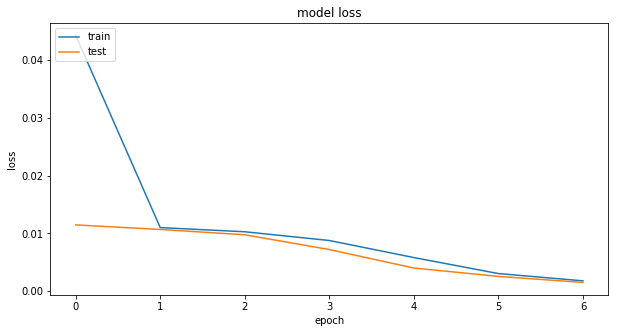

In [71]:
# Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Proxy testing
encoded_imgs = encoder.predict(test[:,:10].T)
decoded_imgs = autoencoder.predict(test[:,:10].T)

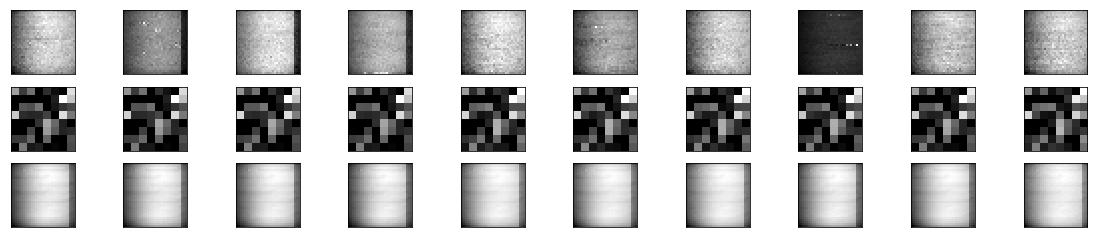

In [14]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test.T[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

# Non_CNN 128x128 image model (using cv2 instead of Image library)

## Machine_y images processing

In [2]:
import numpy as np
import os
from tqdm import tqdm_notebook
import cv2

directory = './machine_y/'

data_y = []

for file in tqdm_notebook(os.listdir(directory)):
    if file.endswith(".jpg"):
        img = cv2.imread(directory+file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_resize_flat = cv2.resize(gray, (128, 128)).flatten()
        
        data_y.append(gray_resize_flat)
#         print(file)

data_y = np.array(data_y)

df_y = pd.DataFrame(data_y.T)
store = pd.HDFStore('./machine_data.h5')
store['/machine_y_128'] = df_y
store.close()

HBox(children=(IntProgress(value=0, max=24774), HTML(value='')))

## Model (512 encoder)

In [30]:
store = pd.HDFStore('./machine_data.h5')
df_y_128 = store['/machine_y_128']
store.close()

In [31]:
data_128 = df_y_128.values/255.

In [32]:
train_128 = data_128[:,:20000]
test_128 = data_128[:,20000:]

In [35]:
#Random seed
np.random.seed(42)

# Network architecture
input_image_128 = Input(shape=(16384,))
encoded_128 = Dense(8192, activation='relu', name='first_encoder_layer_128')(input_image_128)
encoded_128 = Dense(4096, activation='relu', name='second_encoder_layer_128')(encoded_128)
encoded_128 = Dense(2048, activation='relu', name='third_encoder_layer_128')(encoded_128)
encoded_128 = Dense(1024, activation='relu', name='fourth_encoder_layer_128')(encoded_128)
encoded_128 = Dense(512, activation='relu', name='fifth_encoder_layer_128')(encoded_128)

decoded_128 = Dense(1024, activation='relu', name='second_decoder_layer_128')(encoded_128)
decoded_128 = Dense(2048, activation='relu', name='third_decoder_layer_128')(decoded_128)
decoded_128 = Dense(4096, activation='relu', name='fourth_decoder_layer_128')(decoded_128)
decoded_128 = Dense(8192, activation='relu', name='fifth_decoder_layer_128')(decoded_128)

In [36]:
# Autoencoder
autoencoder_128 = Model(input_image_128, decoded_128)

# Encoder
encoder_128 = Model(input_image_128, encoded_128)

autoencoder_128.compile(optimizer='adadelta', loss='mse')

In [37]:
history_128 = autoencoder_128.fit(train_128.T, train_128.T,
               epochs=10,
               batch_size=128,
               shuffle=True,
               validation_data=(test_128.T, test_128.T),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_128x128')])

Train on 20000 samples, validate on 4774 samples
Epoch 1/10
20000/20000 [==============================] - 1082s 54ms/step - loss: 0.0637 - val_loss: 0.0195
Epoch 2/10
20000/20000 [==============================] - 1035s 52ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 3/10
20000/20000 [==============================] - 1066s 53ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 4/10
20000/20000 [==============================] - 1009s 50ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 5/10
20000/20000 [==============================] - 1017s 51ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 6/10
20000/20000 [==============================] - 1015s 51ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 7/10
20000/20000 [==============================] - 1007s 50ms/step - loss: 0.0112 - val_loss: 0.0115
Epoch 8/10
20000/20000 [==============================] - 1034s 52ms/step - loss: 0.0109 - val_loss: 0.0111
Epoch 9/10
20000/20000 [==============================] - 1023s 51ms/step - loss: 0.010

Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history_128.history['loss'])
plt.plot(history_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Proxy testing
encoded_imgs_128 = encoder_128.predict(test_128[:,:10].T)
decoded_imgs_128 = autoencoder_128.predict(test_128[:,:10].T)

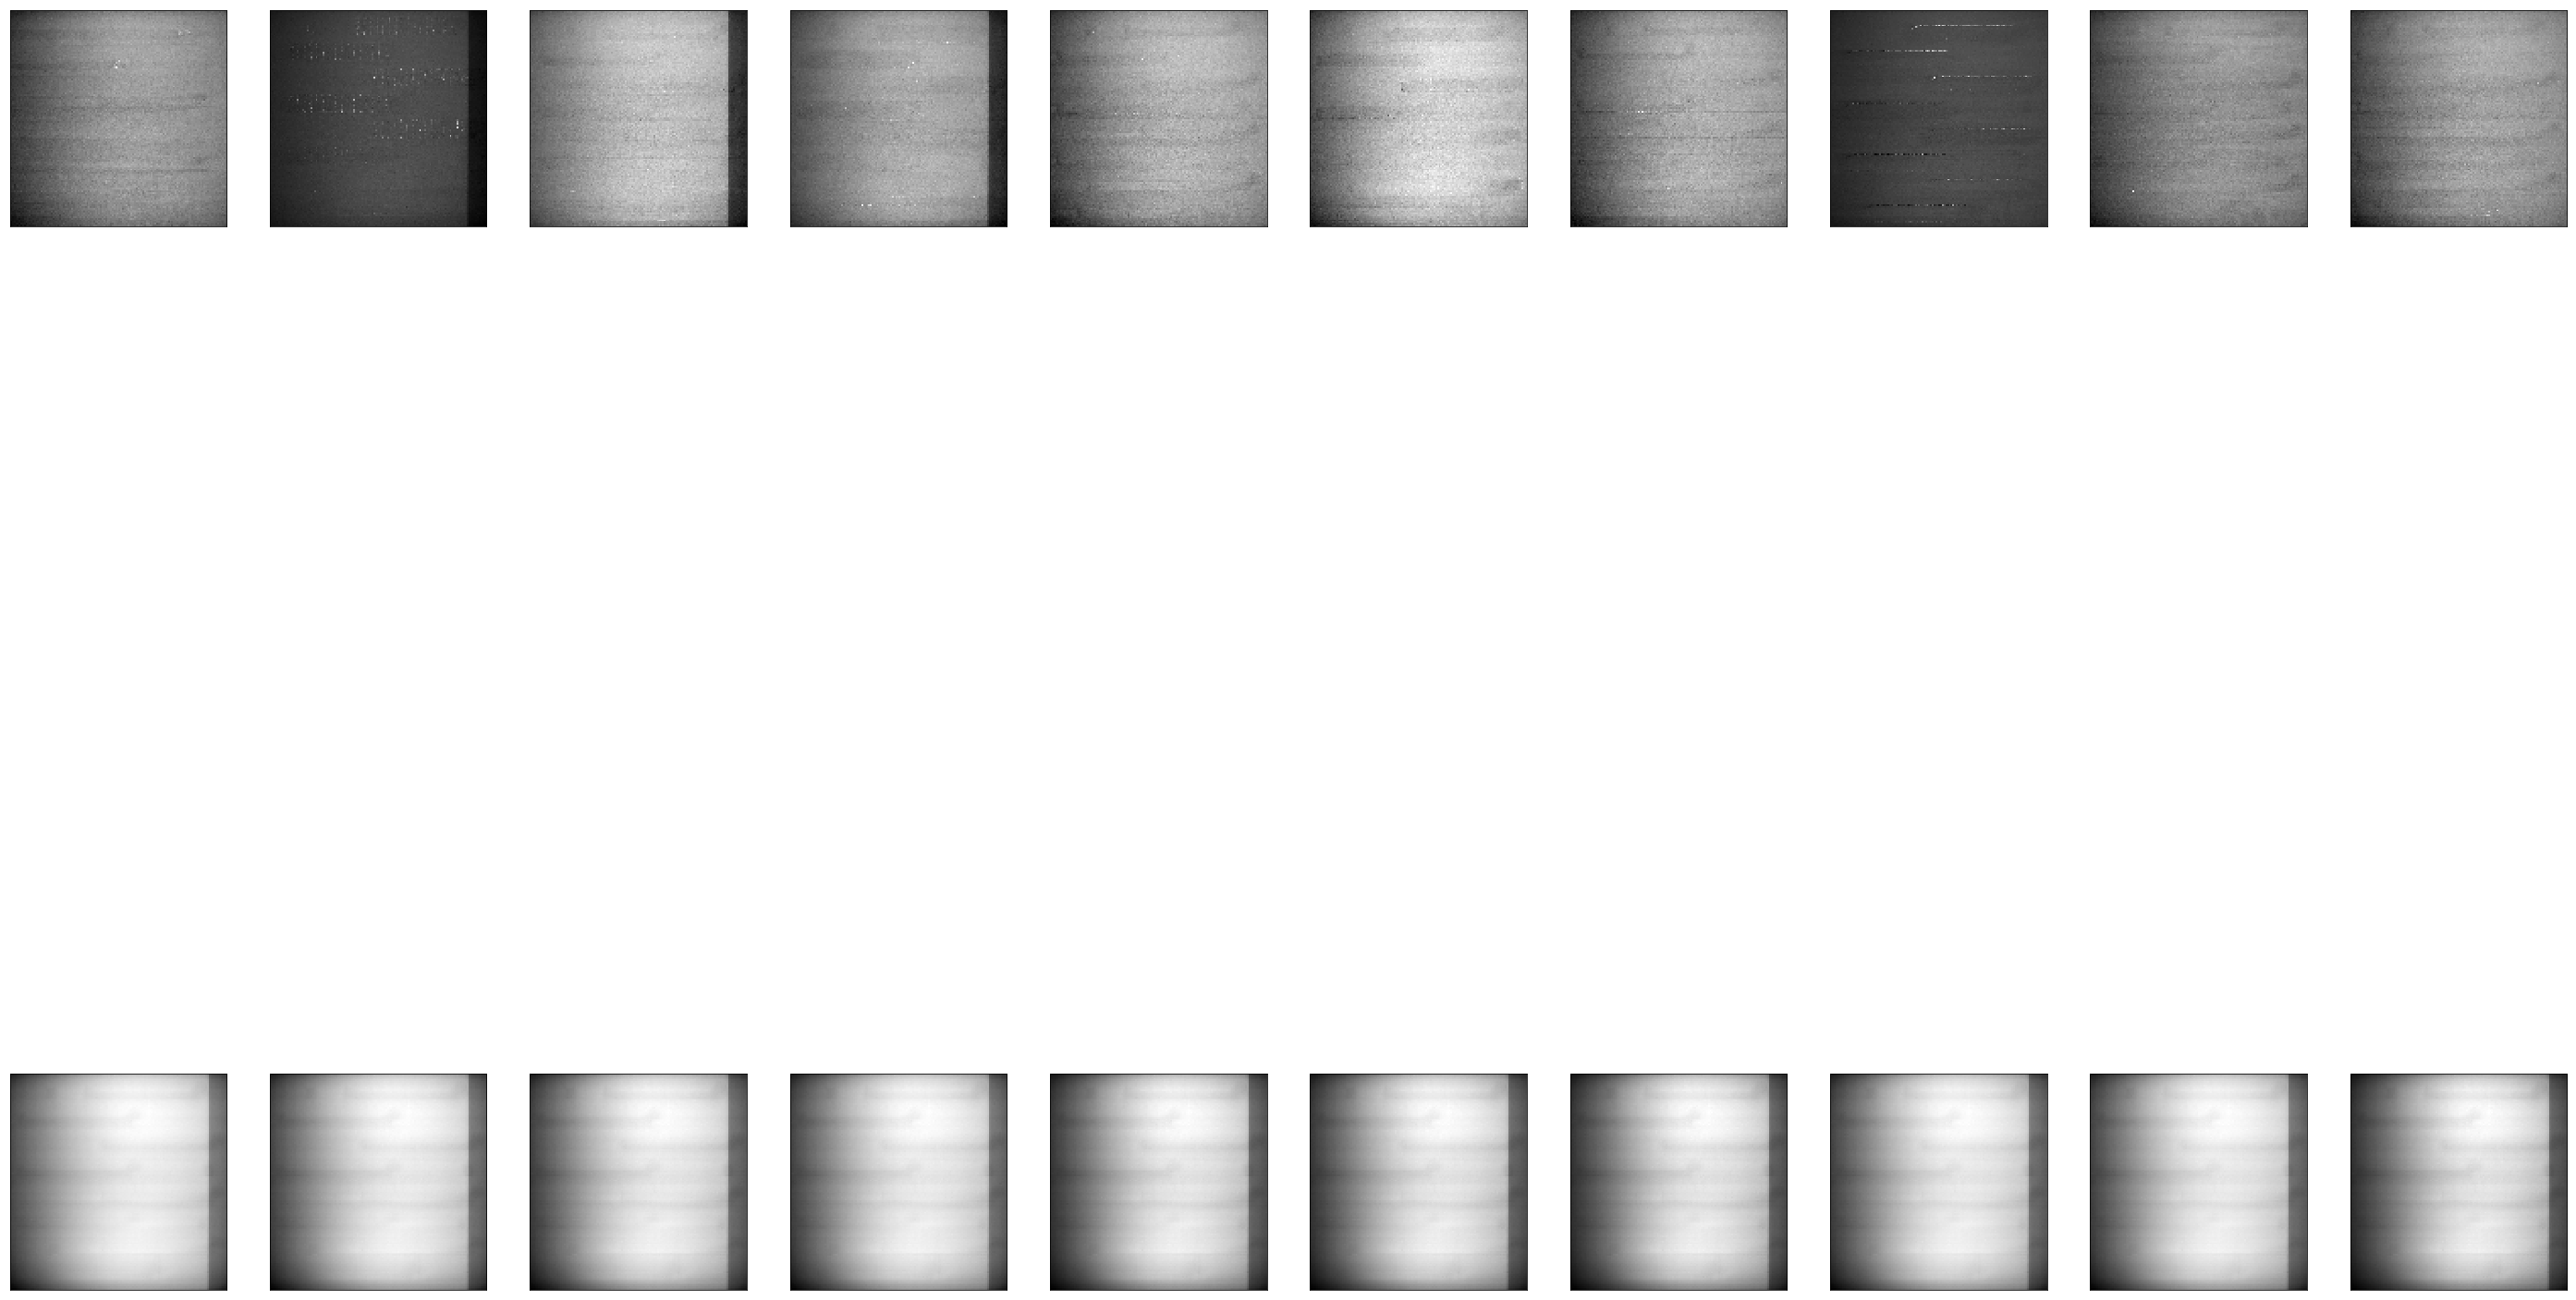

In [54]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(100, 30))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_128.T[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
#     # display encoded images
#     ax = plt.subplot(3, 20, i + 1 + 20)
#     plt.imshow(encoded_imgs_128[i].reshape(24,22))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs_128[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

## Model (64 encoder)

In [57]:
#Random seed
np.random.seed(42)

# Network architecture
input_image_128 = Input(shape=(16384,))
encoded_128 = Dense(8192, activation='relu', name='1st_encoder_layer_128')(input_image_128)
encoded_128 = Dense(4096, activation='relu', name='2nd_encoder_layer_128')(encoded_128)
encoded_128 = Dense(2048, activation='relu', name='3rd_encoder_layer_128')(encoded_128)
encoded_128 = Dense(1024, activation='relu', name='4th_encoder_layer_128')(encoded_128)
encoded_128 = Dense(512, activation='relu', name='5th_encoder_layer_128')(encoded_128)
encoded_128 = Dense(256, activation='relu', name='6th_encoder_layer_128')(encoded_128)
encoded_128 = Dense(128, activation='relu', name='7th_encoder_layer_128')(encoded_128)
encoded_128 = Dense(64, activation='relu', name='8th_encoder_layer_128')(encoded_128)

decoded_128 = Dense(128, activation='relu', name='1st_decoder_layer_128')(encoded_128)
decoded_128 = Dense(256, activation='relu', name='2nd_decoder_layer_128')(decoded_128)
decoded_128 = Dense(512, activation='relu', name='3rd_decoder_layer_128')(decoded_128)
decoded_128 = Dense(1024, activation='relu', name='4th_decoder_layer_128')(decoded_128)
decoded_128 = Dense(2048, activation='relu', name='5th_decoder_layer_128')(decoded_128)
decoded_128 = Dense(4096, activation='relu', name='6th_decoder_layer_128')(decoded_128)
decoded_128 = Dense(8192, activation='relu', name='7th_decoder_layer_128')(decoded_128)
decoded_128 = Dense(16384, activation='sigmoid', name='8th_decoder_layer_128')(decoded_128)

In [58]:
# Autoencoder
autoencoder_128 = Model(input_image_128, decoded_128)

# Encoder
encoder_128 = Model(input_image_128, encoded_128)

autoencoder_128.compile(optimizer='adadelta', loss='mse')

In [59]:
history_128 = autoencoder_128.fit(train_128.T, train_128.T,
               epochs=10,
               batch_size=128,
               shuffle=True,
               validation_data=(test_128.T, test_128.T),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_128x128_v2')])

Train on 20000 samples, validate on 4774 samples
Epoch 1/10
20000/20000 [==============================] - 1188s 59ms/step - loss: 0.0685 - val_loss: 0.0683
Epoch 2/10
20000/20000 [==============================] - 1141s 57ms/step - loss: 0.0682 - val_loss: 0.0681
Epoch 3/10
20000/20000 [==============================] - 1217s 61ms/step - loss: 0.0679 - val_loss: 0.0675
Epoch 4/10
20000/20000 [==============================] - 1111s 56ms/step - loss: 0.0424 - val_loss: 0.0118
Epoch 5/10
20000/20000 [==============================] - 1126s 56ms/step - loss: 0.0117 - val_loss: 0.0119
Epoch 6/10
20000/20000 [==============================] - 1108s 55ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 7/10
20000/20000 [==============================] - 1089s 54ms/step - loss: 0.0113 - val_loss: 0.0118
Epoch 8/10
20000/20000 [==============================] - 1068s 53ms/step - loss: 0.0109 - val_loss: 0.0117
Epoch 9/10
20000/20000 [==============================] - 1078s 54ms/step - loss: 0.010

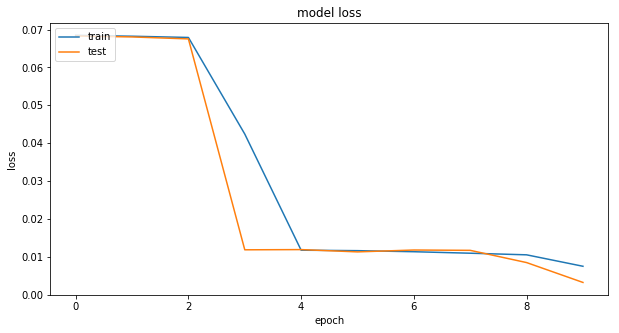

In [69]:
# Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history_128.history['loss'])
plt.plot(history_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# Proxy testing
encoded_imgs_128 = encoder_128.predict(test_128[:,:10].T)
decoded_imgs_128 = autoencoder_128.predict(test_128[:,:10].T)

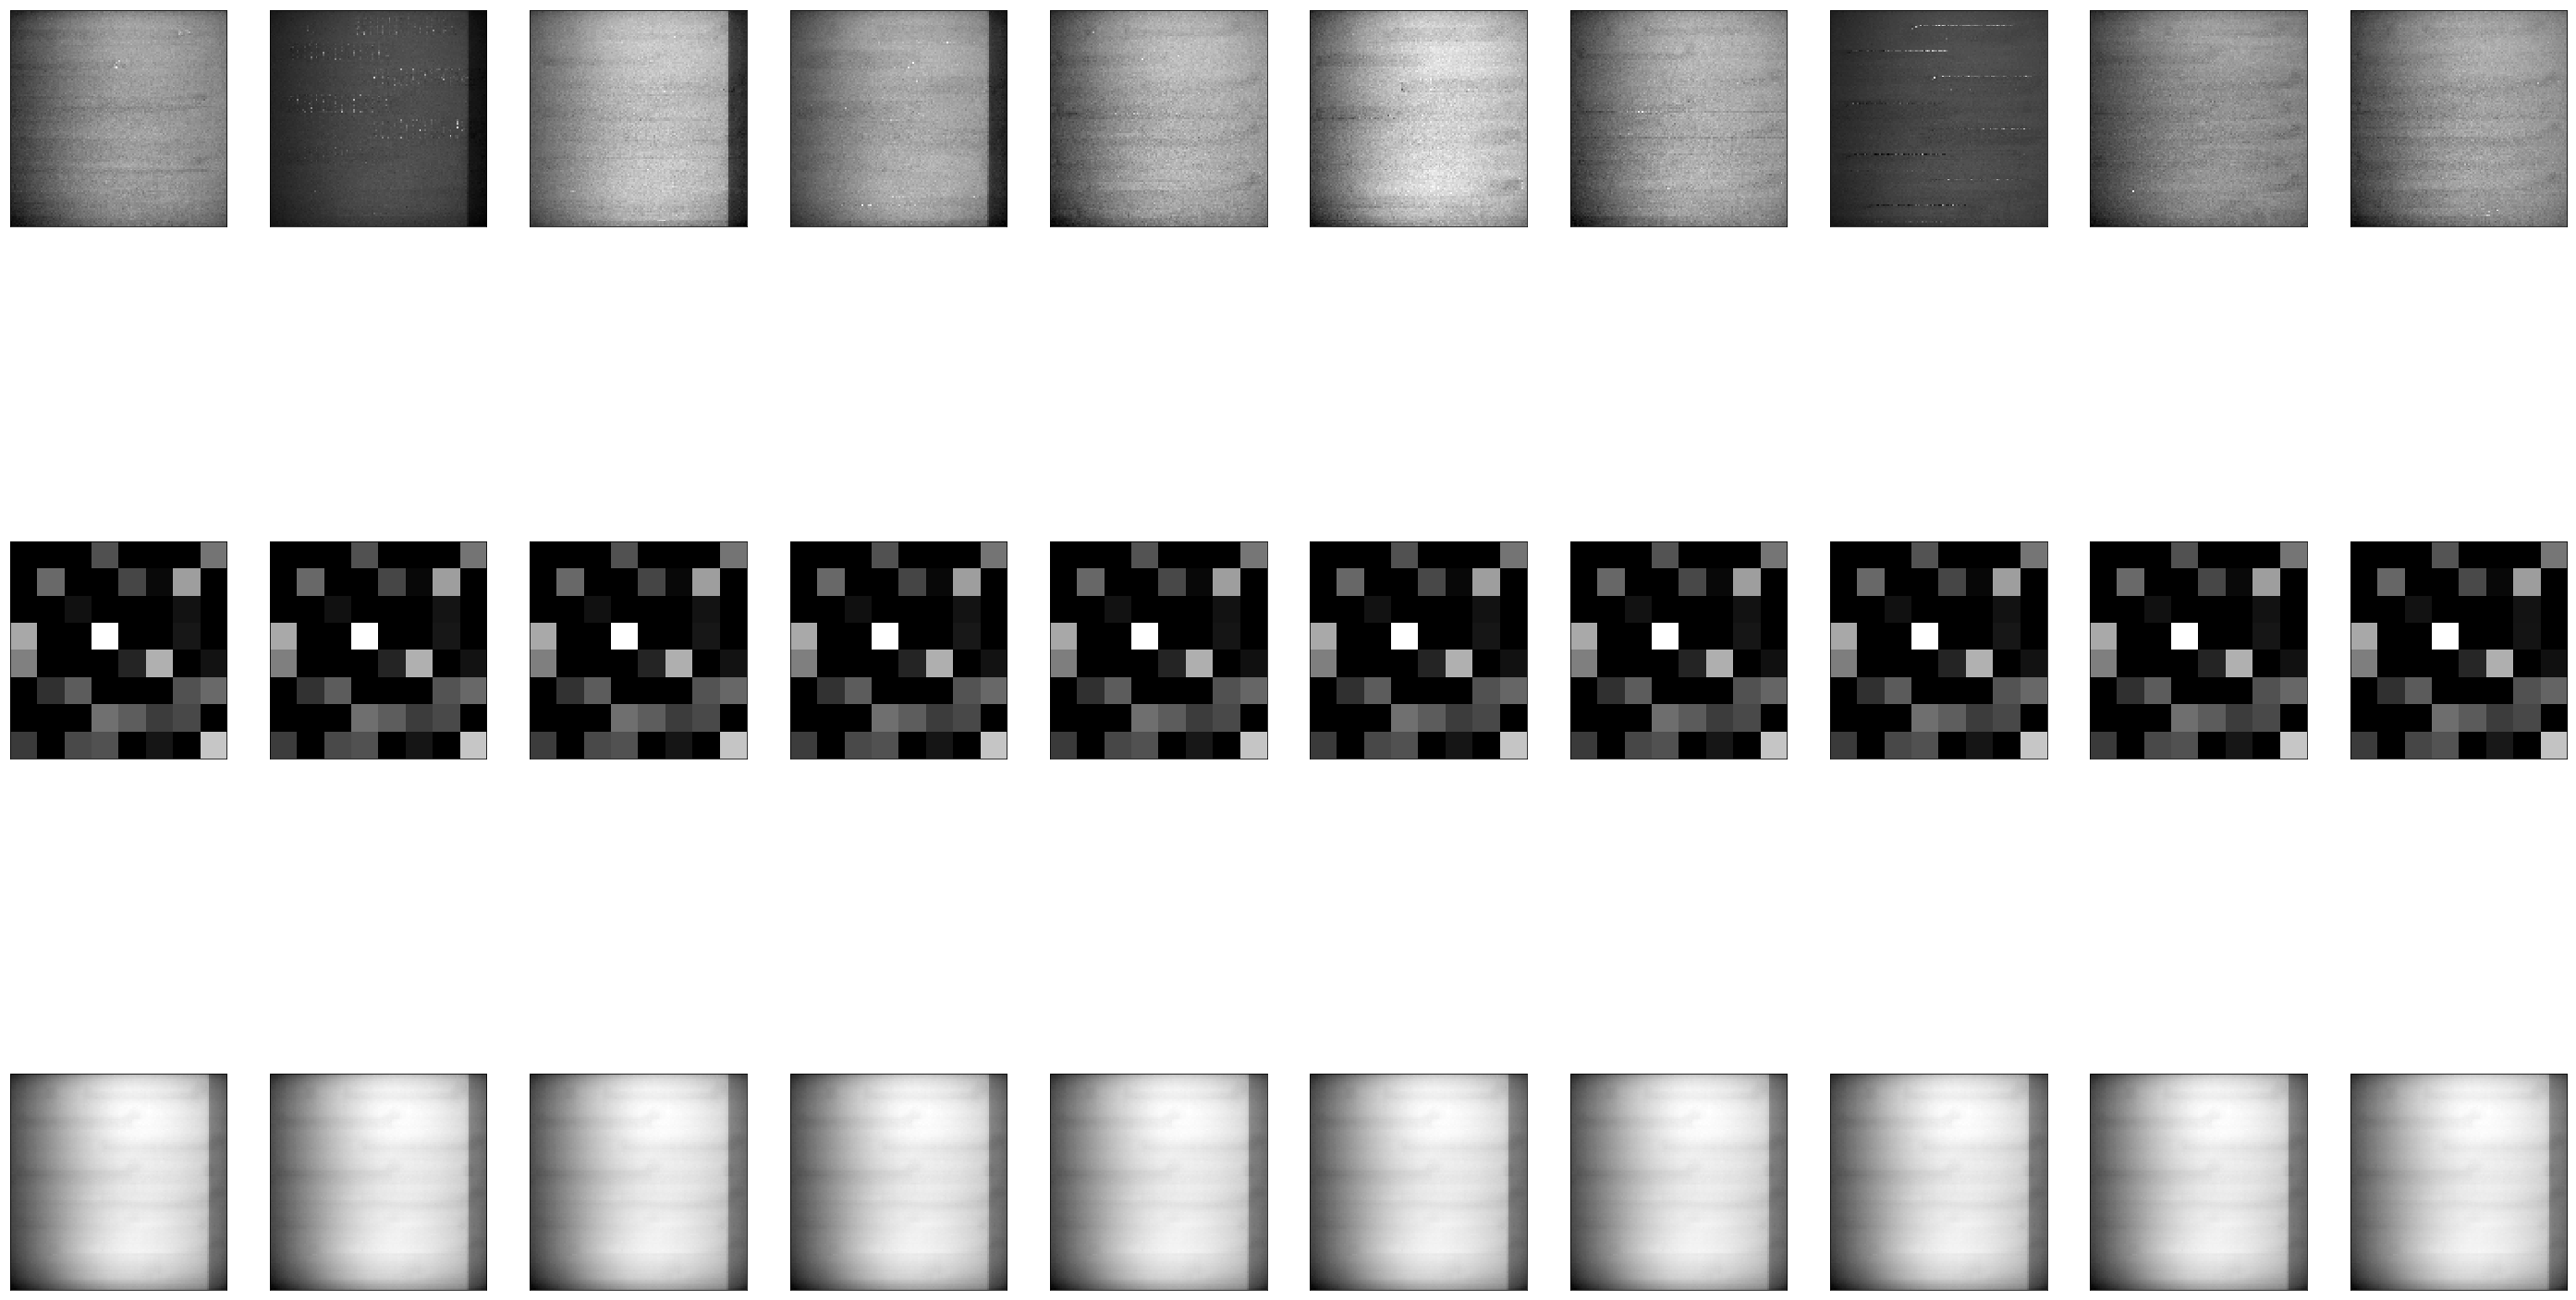

In [67]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(100, 30))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_128.T[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs_128[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs_128[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

# Convolutional NN

## Y machine 128x128

In [1]:
import numpy as np
import os
from tqdm import tqdm_notebook
import cv2

directory = './machine_y/'

data_y = []

for file in tqdm_notebook(os.listdir(directory)):
    if file.endswith(".jpg"):
        img = cv2.imread(directory+file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_resize = cv2.resize(gray, (128, 128))
        
        data_y.append(gray_resize)
#         print(file)

data_y = np.array(data_y)

# df_y = pd.DataFrame(data_y.T)
# store = pd.HDFStore('./machine_data.h5')
# store['/machine_y_128'] = df_y
# store.close()

HBox(children=(IntProgress(value=0, max=24774), HTML(value='')))

In [82]:
data_y.shape

(24774, 128, 128)

In [90]:
data_128_cnn = data_y/255.

In [91]:
data_128_cnn.shape

(24774, 128, 128)

In [100]:
train_128_cnn = data_128_cnn[:20000, :, :]
test_128_cnn = data_128_cnn[20000:, :, :]

train_128_cnn = np.reshape(train_128_cnn, (len(train_128_cnn), 128, 128, 1))
test_128_cnn = np.reshape(test_128_cnn, (len(test_128_cnn), 128, 128, 1))

In [106]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

#Random seed
np.random.seed(42)


# Network architecture
input_image_128_cnn = Input(shape=(128, 128, 1))


# Encoding
encoded_128_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(input_image_128_cnn)
encoded_128_cnn = MaxPooling2D((2, 2), padding='same')(encoded_128_cnn)

encoded_128_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_128_cnn)
encoded_128_cnn = MaxPooling2D((2, 2), padding='same')(encoded_128_cnn)


# Decoding
decoded_128_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_128_cnn)
decoded_128_cnn = UpSampling2D((2, 2))(decoded_128_cnn)

decoded_128_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(decoded_128_cnn)
decoded_128_cnn = UpSampling2D((2, 2))(decoded_128_cnn)

decoded_128_cnn = Conv2D(1, (5, 5), activation='relu', padding='same')(decoded_128_cnn)

In [107]:
# Autoencoder
autoencoder_128_cnn = Model(input_image_128_cnn, decoded_128_cnn)

# Encoder
encoder_128_cnn = Model(input_image_128_cnn, encoded_128_cnn)

autoencoder_128_cnn.compile(optimizer='adadelta', loss='mse')

In [109]:
history_128_cnn = autoencoder_128_cnn.fit(train_128_cnn, train_128_cnn,
               epochs=10,
               batch_size=128,
               shuffle=True,
               validation_data=(test_128_cnn, test_128_cnn),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_128x128_cnn')])

Train on 20000 samples, validate on 4774 samples
Epoch 1/10
20000/20000 [==============================] - 1307s 65ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 2/10
20000/20000 [==============================] - 1286s 64ms/step - loss: 0.0030 - val_loss: 0.0047
Epoch 3/10
20000/20000 [==============================] - 1236s 62ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 4/10
20000/20000 [==============================] - 1174s 59ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 5/10
20000/20000 [==============================] - 1169s 58ms/step - loss: 0.0014 - val_loss: 9.5943e-04
Epoch 6/10
20000/20000 [==============================] - 1195s 60ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/10
20000/20000 [==============================] - 1176s 59ms/step - loss: 0.0011 - val_loss: 9.2918e-04
Epoch 8/10
20000/20000 [==============================] - 1301s 65ms/step - loss: 0.0011 - val_loss: 6.3202e-04
Epoch 9/10
20000/20000 [==============================] - 3555s 178ms/step 

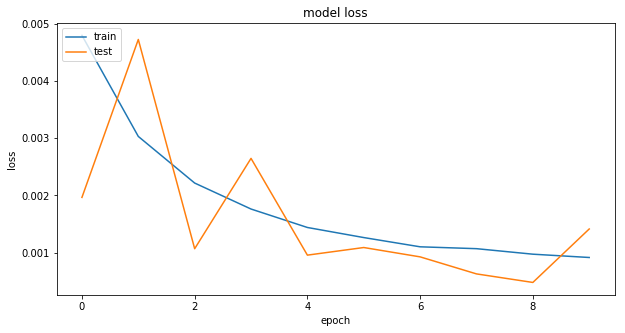

In [110]:
# Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history_128_cnn.history['loss'])
plt.plot(history_128_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
# Proxy testing
encoded_imgs_128_cnn = encoder_128_cnn.predict(test_128_cnn[:10, :, :, ])
decoded_imgs_128_cnn = autoencoder_128_cnn.predict(test_128_cnn[:10, :, :, ])

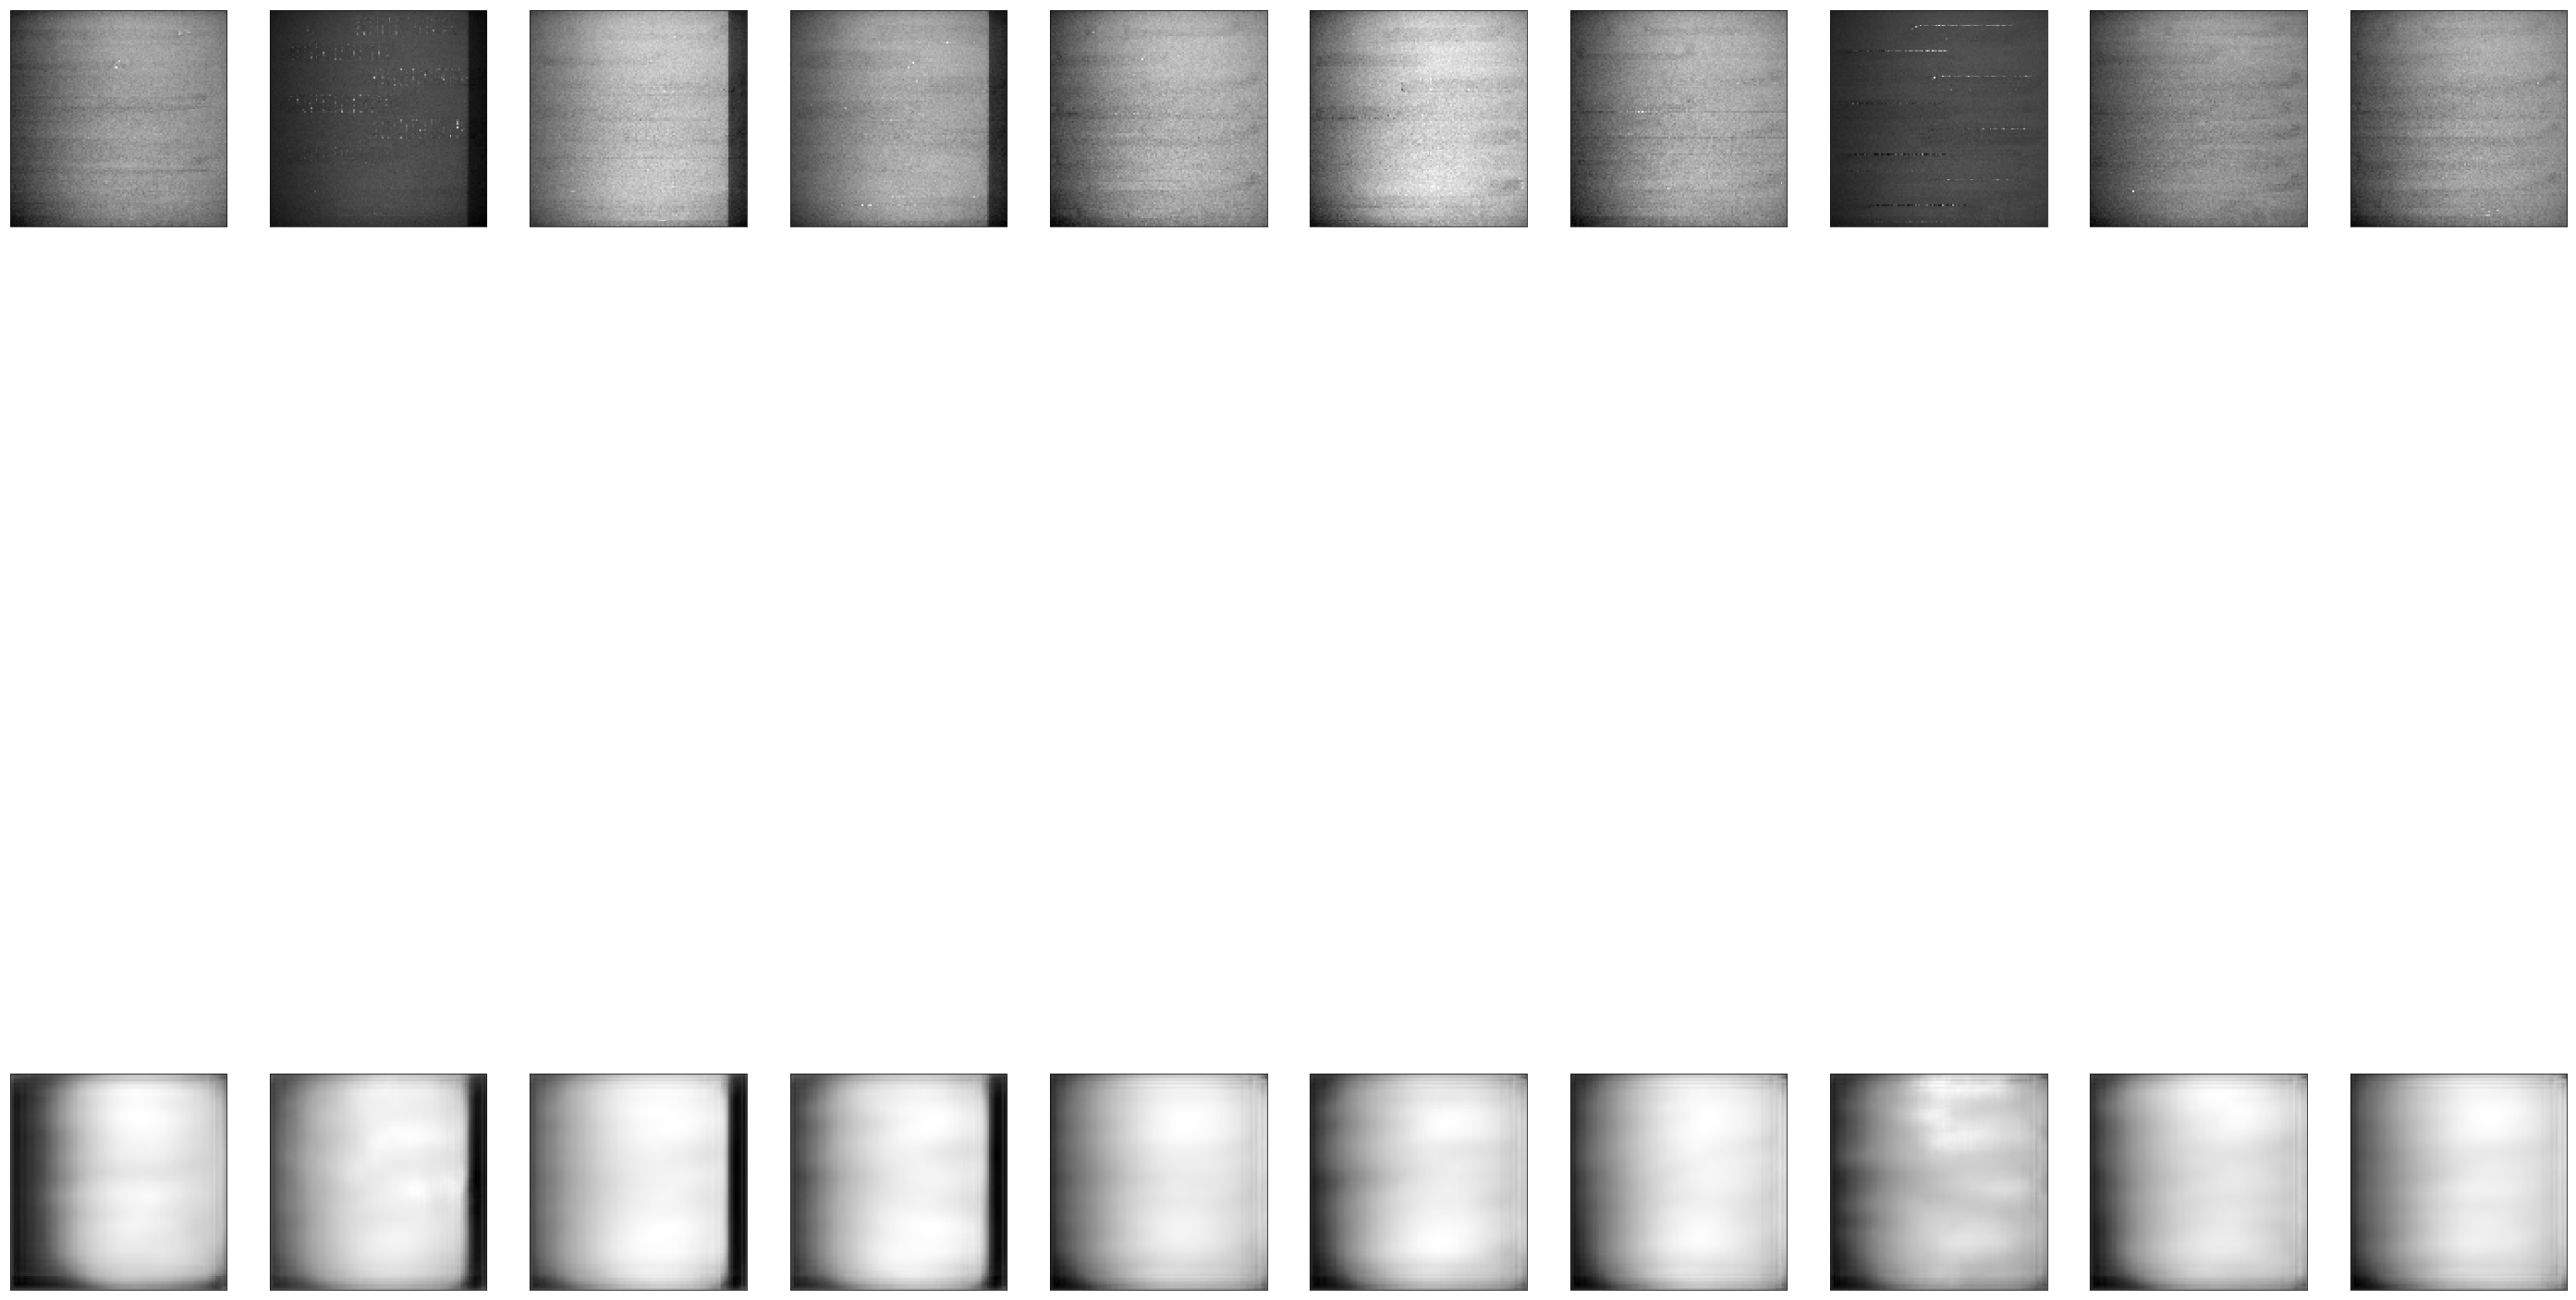

In [118]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(100, 30))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_128_cnn[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
#     # display encoded images
#     ax = plt.subplot(3, 20, i + 1 + 20)
#     plt.imshow(encoded_imgs_128_cnn[i].reshape(32,32))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs_128_cnn[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

## Z machine 128x128

In [121]:
import numpy as np
import os
from tqdm import tqdm_notebook
import cv2

directory = './machine_z/'

data_z = []

for file in tqdm_notebook(os.listdir(directory)):
    if file.endswith(".jpg"):
        img = cv2.imread(directory+file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_resize = cv2.resize(gray, (128, 128))
        
        data_z.append(gray_resize)
#         print(file)

data_z = np.array(data_z)

# df_y = pd.DataFrame(data_y.T)
# store = pd.HDFStore('./machine_data.h5')
# store['/machine_y_128'] = df_y
# store.close()

HBox(children=(IntProgress(value=0, max=33053), HTML(value='')))

In [122]:
data_z.shape

(33053, 128, 128)

In [123]:
data_128_cnn = data_z/255.

In [124]:
data_128_cnn.shape

(33053, 128, 128)

In [125]:
train_128_cnn = data_128_cnn[:30000, :, :]
test_128_cnn = data_128_cnn[30000:, :, :]

train_128_cnn = np.reshape(train_128_cnn, (len(train_128_cnn), 128, 128, 1))
test_128_cnn = np.reshape(test_128_cnn, (len(test_128_cnn), 128, 128, 1))

In [126]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

#Random seed
np.random.seed(42)


# Network architecture
input_image_128_cnn = Input(shape=(128, 128, 1))


# Encoding
encoded_128_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(input_image_128_cnn)
encoded_128_cnn = MaxPooling2D((2, 2), padding='same')(encoded_128_cnn)

encoded_128_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_128_cnn)
encoded_128_cnn = MaxPooling2D((2, 2), padding='same')(encoded_128_cnn)


# Decoding
decoded_128_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_128_cnn)
decoded_128_cnn = UpSampling2D((2, 2))(decoded_128_cnn)

decoded_128_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(decoded_128_cnn)
decoded_128_cnn = UpSampling2D((2, 2))(decoded_128_cnn)

decoded_128_cnn = Conv2D(1, (5, 5), activation='relu', padding='same')(decoded_128_cnn)

In [127]:
# Autoencoder
autoencoder_128_cnn = Model(input_image_128_cnn, decoded_128_cnn)

# Encoder
encoder_128_cnn = Model(input_image_128_cnn, encoded_128_cnn)

autoencoder_128_cnn.compile(optimizer='adadelta', loss='mse')

In [128]:
history_128_cnn = autoencoder_128_cnn.fit(train_128_cnn, train_128_cnn,
               epochs=10,
               batch_size=128,
               shuffle=True,
               validation_data=(test_128_cnn, test_128_cnn),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_128x128_cnn_zMachine')])

Train on 30000 samples, validate on 3053 samples
Epoch 1/10
30000/30000 [==============================] - 1709s 57ms/step - loss: 0.0182 - val_loss: 0.0078
Epoch 2/10
30000/30000 [==============================] - 1773s 59ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 3/10
30000/30000 [==============================] - 1770s 59ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 4/10
30000/30000 [==============================] - 1798s 60ms/step - loss: 0.0070 - val_loss: 0.0096
Epoch 5/10
30000/30000 [==============================] - 1805s 60ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 6/10
30000/30000 [==============================] - 1815s 60ms/step - loss: 0.0050 - val_loss: 0.0079
Epoch 7/10
30000/30000 [==============================] - 1815s 61ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 8/10
30000/30000 [==============================] - 1802s 60ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 9/10
30000/30000 [==============================] - 1777s 59ms/step - loss: 0.003

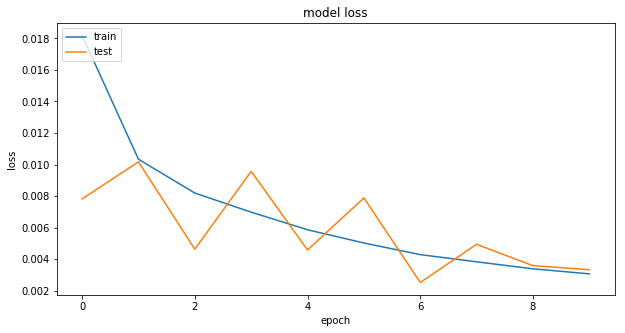

In [129]:
# Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history_128_cnn.history['loss'])
plt.plot(history_128_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
# Proxy testing
encoded_imgs_128_cnn = encoder_128_cnn.predict(test_128_cnn[:10, :, :, ])
decoded_imgs_128_cnn = autoencoder_128_cnn.predict(test_128_cnn[:10, :, :, ])

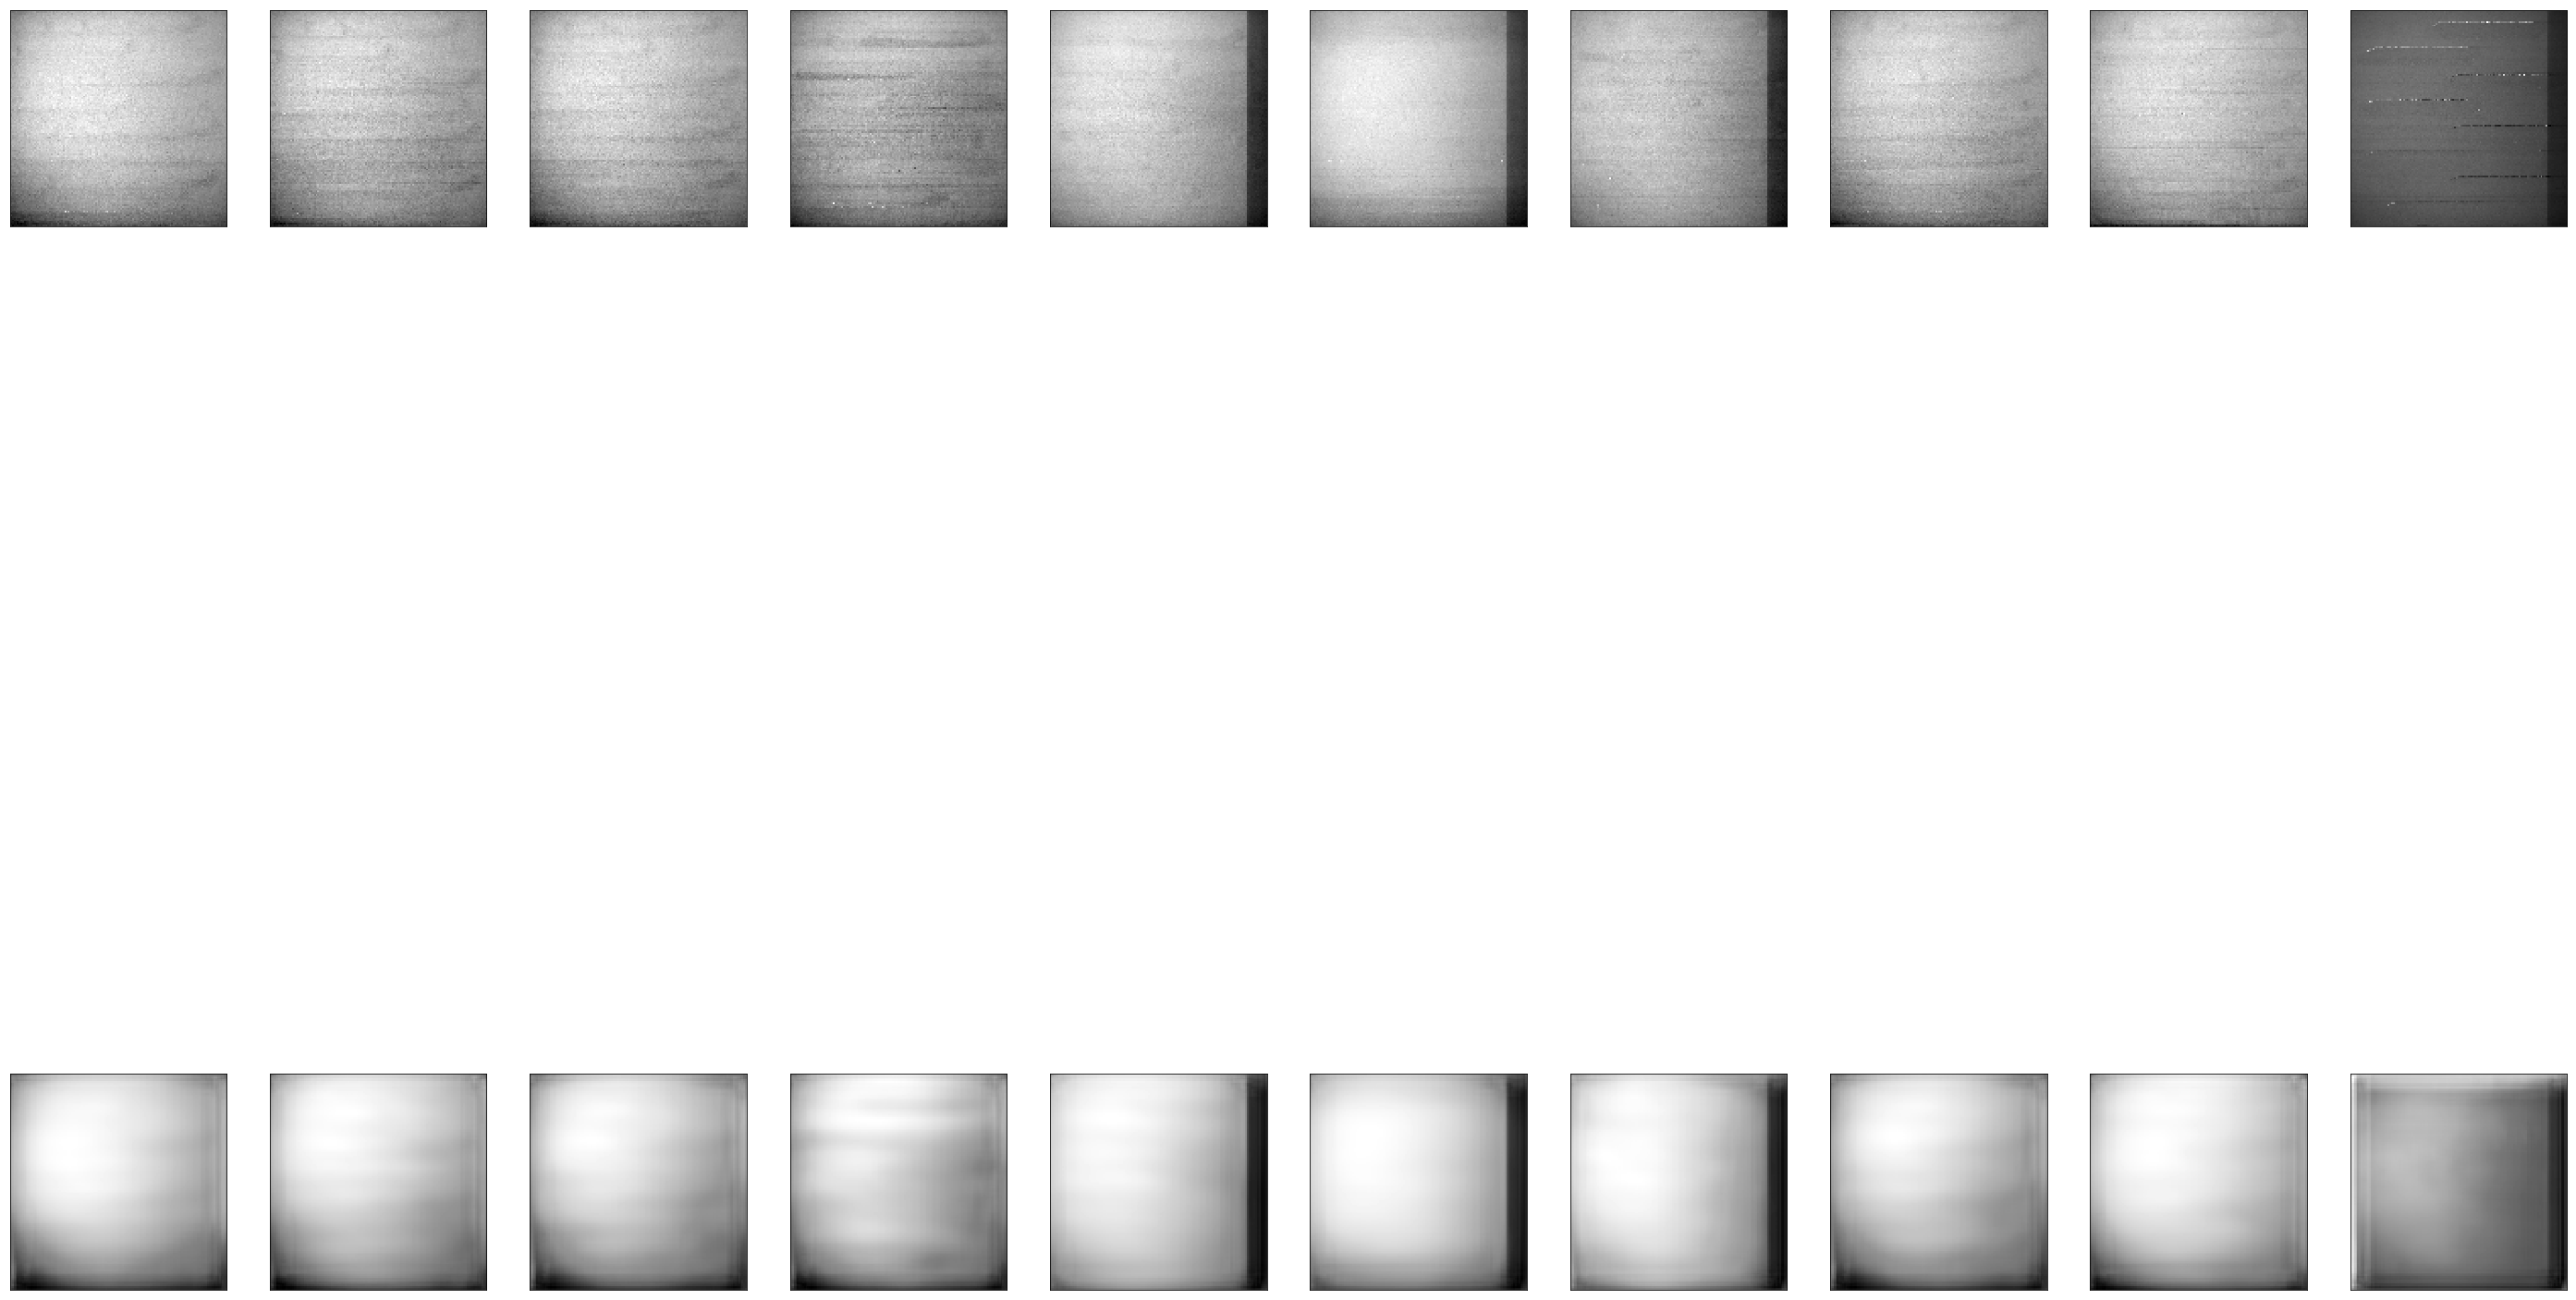

In [131]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(100, 30))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_128_cnn[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
#     # display encoded images
#     ax = plt.subplot(3, 20, i + 1 + 20)
#     plt.imshow(encoded_imgs_128_cnn[i].reshape(32,32))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs_128_cnn[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

## Y machine 256x256

In [1]:
import numpy as np
import os
from tqdm import tqdm_notebook
import cv2

directory = './machine_y/'

data_y = []
# i = 0
for file in tqdm_notebook(os.listdir(directory)):
    if file.endswith(".jpg"):
        img = cv2.imread(directory+file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_resize = cv2.resize(gray, (256, 256))
        
        data_y.append(gray_resize)
#         i+=1
        
# #         if i==15000:
# #             break


# df_y = pd.DataFrame(data_y.T)
# store = pd.HDFStore('./machine_data.h5')
# store['/machine_y_128'] = df_y
# store.close()

HBox(children=(IntProgress(value=0, max=24774), HTML(value='')))

In [2]:
data_y = np.array(data_y)
data_y.shape

(24774, 256, 256)

In [3]:
data_256_cnn = data_y/255.

In [4]:
data_256_cnn.shape

(24774, 256, 256)

In [5]:
train_256_cnn = data_256_cnn[:20000, :, :]
test_256_cnn = data_256_cnn[20000:, :, :]

train_256_cnn = np.reshape(train_256_cnn, (len(train_256_cnn), 256, 256, 1))
test_256_cnn = np.reshape(test_256_cnn, (len(test_256_cnn), 256, 256, 1))

In [26]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

#Random seed
np.random.seed(42)


# Network architecture
input_image_256_cnn = Input(shape=(256, 256, 1))


# Encoding
encoded_256_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(input_image_256_cnn)
encoded_256_cnn = MaxPooling2D((2, 2), padding='same')(encoded_256_cnn)

encoded_256_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(encoded_256_cnn)
encoded_256_cnn = MaxPooling2D((2, 2), padding='same')(encoded_256_cnn)

encoded_256_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_256_cnn)
encoded_256_cnn = MaxPooling2D((2, 2), padding='same')(encoded_256_cnn)


# Decoding
decoded_256_cnn = Conv2D(16, (5, 5), activation='relu', padding='same')(encoded_256_cnn)
decoded_256_cnn = UpSampling2D((2, 2))(decoded_256_cnn)

decoded_256_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(decoded_256_cnn)
decoded_256_cnn = UpSampling2D((2, 2))(decoded_256_cnn)

decoded_256_cnn = Conv2D(32, (5, 5), activation='relu', padding='same')(decoded_256_cnn)
decoded_256_cnn = UpSampling2D((2, 2))(decoded_256_cnn)

decoded_256_cnn = Conv2D(1, (5, 5), activation='relu', padding='same')(decoded_256_cnn)

In [27]:
# Autoencoder
autoencoder_256_cnn = Model(input_image_256_cnn, decoded_256_cnn)

# Encoder
encoder_256_cnn = Model(input_image_256_cnn, encoded_256_cnn)

autoencoder_256_cnn.compile(optimizer='adadelta', loss='mse')

In [28]:
history_256_cnn = autoencoder_256_cnn.fit(train_256_cnn, train_256_cnn,
               epochs=10,
               batch_size=64,
               shuffle=True,
               validation_data=(test_256_cnn, test_256_cnn),
               callbacks=[TensorBoard(log_dir='./tmp/keras_autoencoder_256x256_cnn_yMachine')])

Train on 20000 samples, validate on 4774 samples
Epoch 1/10
20000/20000 [==============================] - 8965s 448ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 2/10
20000/20000 [==============================] - 6612s 331ms/step - loss: 0.0025 - val_loss: 9.3622e-04
Epoch 3/10
20000/20000 [==============================] - 6614s 331ms/step - loss: 0.0016 - val_loss: 5.4056e-04
Epoch 4/10
20000/20000 [==============================] - 6648s 332ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/10
20000/20000 [==============================] - 6696s 335ms/step - loss: 9.8783e-04 - val_loss: 8.0713e-04
Epoch 6/10
20000/20000 [==============================] - 6648s 332ms/step - loss: 8.5776e-04 - val_loss: 6.4234e-04
Epoch 7/10
20000/20000 [==============================] - 6621s 331ms/step - loss: 7.8851e-04 - val_loss: 0.0016
Epoch 8/10
20000/20000 [==============================] - 6606s 330ms/step - loss: 6.7006e-04 - val_loss: 0.0014
Epoch 9/10
20000/20000 [=======================

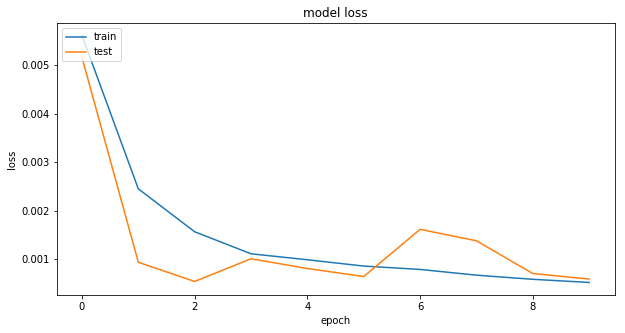

In [29]:
# Plotting learning curve
plt.figure(figsize=(10,5))
plt.plot(history_256_cnn.history['loss'])
plt.plot(history_256_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Proxy testing
encoded_imgs_256_cnn = encoder_256_cnn.predict(test_256_cnn[:10, :, :, ])
decoded_imgs_256_cnn = autoencoder_256_cnn.predict(test_256_cnn[:10, :, :, ])

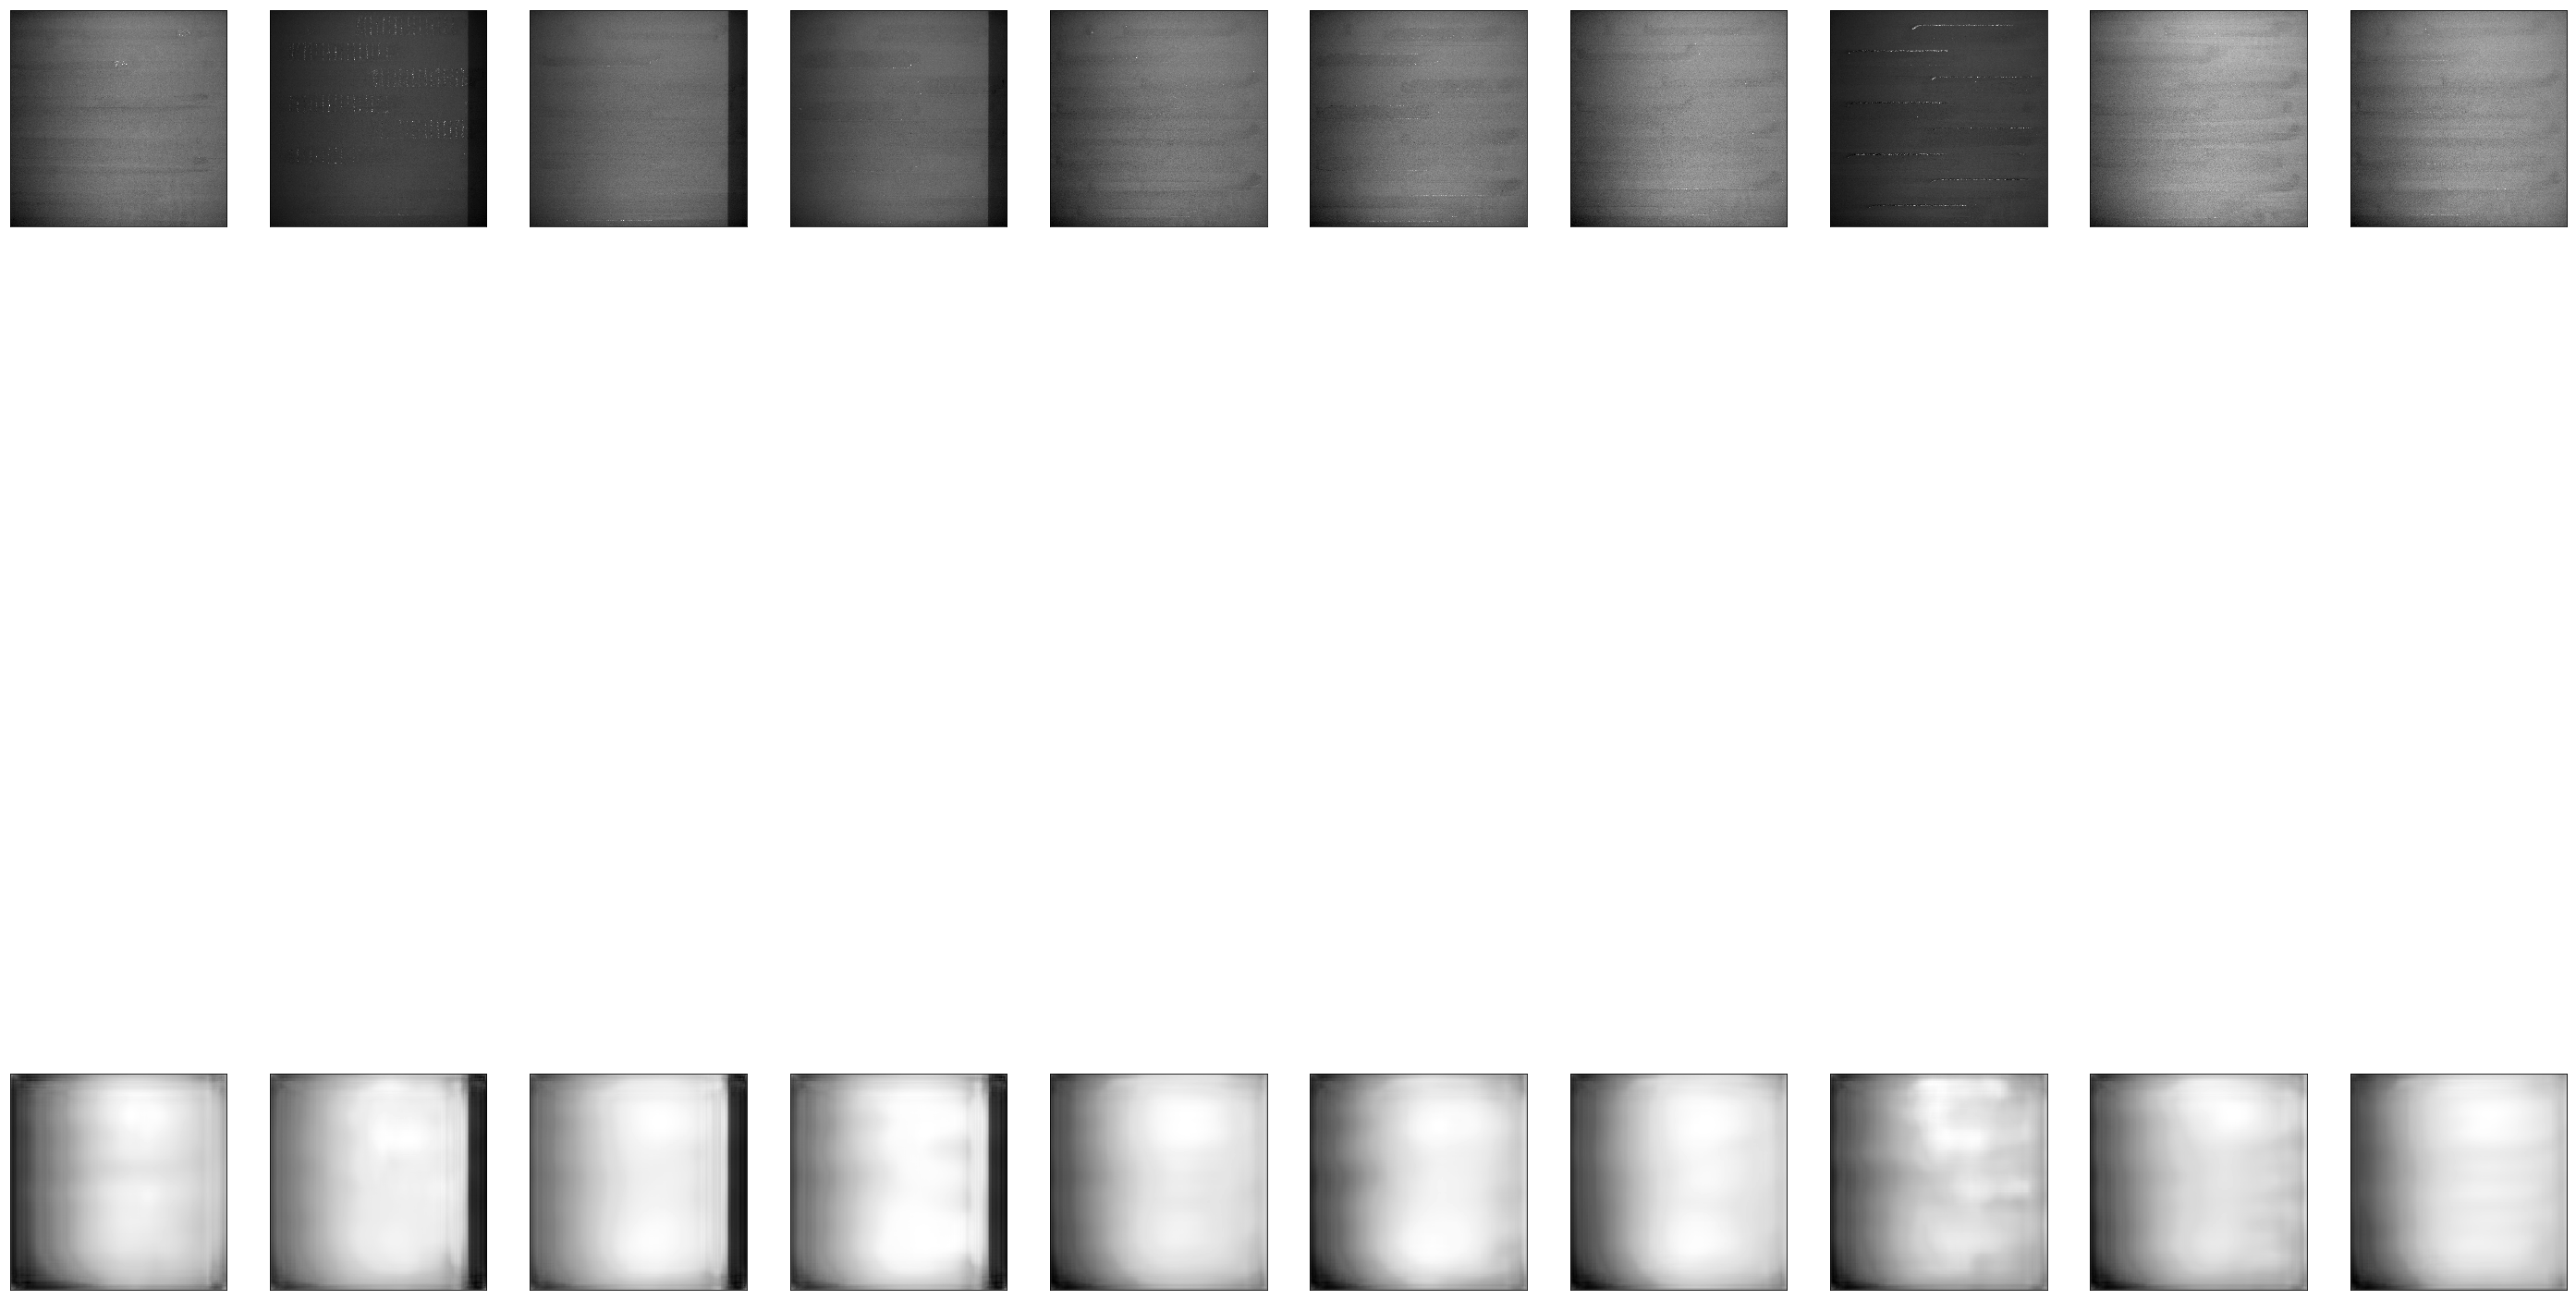

In [31]:
# Plotting the images (original - encoded - decoded)

plt.figure(figsize=(100, 30))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_256_cnn[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
#     # display encoded images
#     ax = plt.subplot(3, 20, i + 1 + 20)
#     plt.imshow(encoded_imgs_256_cnn[i].reshape(32,32))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_imgs_256_cnn[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [37]:
difference = []
for i in range(decoded_imgs_256_cnn.shape[0]):
    diff = (test_256_cnn[i, :, :, ] - decoded_imgs_256_cnn[i]).mean()
    difference.append(diff)
    print(diff)
    

0.009261092483446942
0.012488591323249153
0.014631781971829965
0.011838208621155921
0.01666483712394046
0.014566024931193671
0.016458520356025692
0.011883294359758755
0.014152874029406463
0.021112346562680545


In [43]:
np.mean(difference)

0.014305757176268757

In [44]:
# # serialize model to JSON
# model_json = autoencoder_256_cnn.to_json()
# with open("autoencoder_256_cnn.json", "w") as json_file:
#     json_file.write(model_json)
    
# serialize weights to HDF5
autoencoder_256_cnn.save_weights("autoencoder_256_cnn_sigmoid.h5")
print("Saved model to disk")

Saved model to disk
